In [2]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
df.shape

(3376, 46)

In [5]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [6]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [7]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [8]:
df.shape # la taille passe de (3376, 46) à (1668, 46)

(1668, 46)

In [9]:
#'GHGEmissionsIntensity',TotalGHGEmissions
#'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'

### Elimination de quelques variables non pertinenetes

In [10]:
#variables pas trop pertinentes pour le projet
#df['DataYear'].unique()#il s'agit d'une seule année du coup on va éliminer ce champ des variables à retenir
#DataYear, PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode
df=df.loc[:, ~df.columns.isin(['DataYear','PrimaryPropertyType','PropertyName','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode'])]

In [11]:
df.shape

(1668, 40)

<AxesSubplot:>

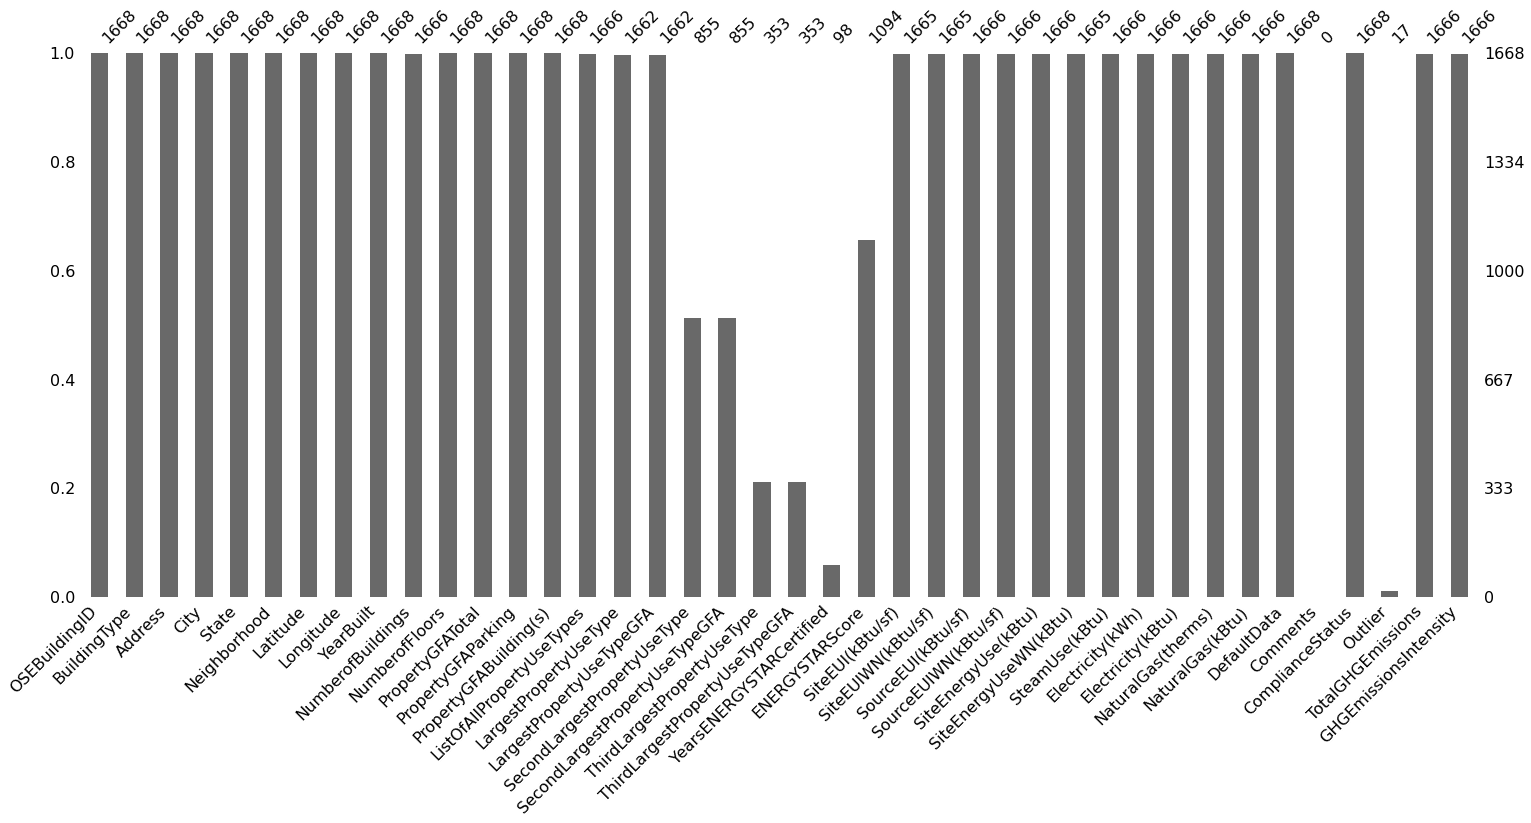

In [12]:
msno.bar(df)

In [13]:

df.dtypes

OSEBuildingID                        int64
BuildingType                        object
Address                             object
City                                object
State                               object
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

In [59]:
df.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,1.662000e+03,...,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,9.876469e+04,...,8.437933e+06,8.064790e+06,5.125726e+05,1.712630e+06,5.843493e+06,1.970845e+04,1.970845e+06,NaN,184.973301,1.607845
std,13835.292512,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,2.767111e+05,...,3.024380e+07,2.203878e+07,5.513944e+06,6.095172e+06,2.079673e+07,9.370814e+04,9.370814e+06,NaN,751.976001,2.336882
min,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,582.750000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,2.552750e+04,...,1.229291e+06,1.294615e+06,0.000000e+00,2.114083e+05,7.213255e+05,0.000000e+00,0.000000e+00,NaN,19.967500,0.350000
50%,21143.500000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,4.377050e+04,...,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,NaN,49.580000,0.880000
75%,24602.250000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.475975e+04,9.198375e+04,...,6.913348e+06,7.109712e+06,0.000000e+00,1.420747e+06,4.847589e+06,1.520000e+04,1.520000e+06,NaN,142.382500,1.890000
max,50226.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


### Nettoyage

**Note**<br>
TotalGHGEmissions,GHGEmissionsIntensity, Electricity(kBtu) et Electricity(kWh)  contiennenet des valeurs négatives.On va les remplacer par 0.

In [65]:
num = df._get_numeric_data()
num[num < 0] = 0
df.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.000000,1668.0,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,1.662000e+03,...,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,47.616054,0.0,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,9.876469e+04,...,8.437933e+06,8.064790e+06,5.125726e+05,1.712650e+06,5.843562e+06,1.970845e+04,1.970845e+06,NaN,184.973782,1.607857
std,13835.292512,0.048168,0.0,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,2.767111e+05,...,3.024380e+07,2.203878e+07,5.513944e+06,6.095166e+06,2.079671e+07,9.370814e+04,9.370814e+06,NaN,751.975882,2.336874
min,1.000000,47.499170,0.0,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000
25%,582.750000,47.585458,0.0,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,2.552750e+04,...,1.229291e+06,1.294615e+06,0.000000e+00,2.114083e+05,7.213255e+05,0.000000e+00,0.000000e+00,NaN,19.967500,0.350000
50%,21143.500000,47.612340,0.0,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,4.377050e+04,...,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,NaN,49.580000,0.880000
75%,24602.250000,47.649675,0.0,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.475975e+04,9.198375e+04,...,6.913348e+06,7.109712e+06,0.000000e+00,1.420747e+06,4.847589e+06,1.520000e+04,1.520000e+06,NaN,142.382500,1.890000
max,50226.000000,47.733870,0.0,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [66]:
df['YearsENERGYSTARCertified'].unique()

array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

**Note**<br>
la variable 'YearsENERGYSTARCertified' contient des valeurs d'années concaténés.On ne va pas tenir compte de ce champ dans la suite

### Choix de la variable cible (émissions de CO2)

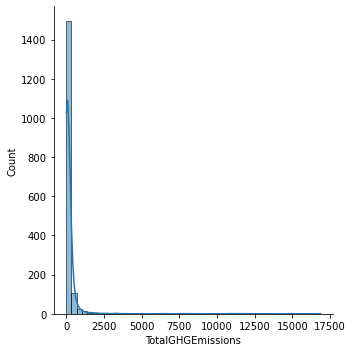

In [14]:
#Distribution de la variable cible
sns.displot(data=df,x='TotalGHGEmissions', bins=50,kde=True)

In [15]:
unique_TotalGHGEmissions=df['TotalGHGEmissions'].unique()
print(df['TotalGHGEmissions'].isnull().mean()*100,' valeurs non nulles')
print(len(unique_TotalGHGEmissions),' différents values\n')
print(len(unique_TotalGHGEmissions)*100/df.shape[0],'% différents values')

0.1199040767386091  valeurs non nulles
1595  différents values

95.62350119904077 % différents values


In [16]:
#descriptive statistics summary
df['TotalGHGEmissions'].describe()

count     1666.000000
mean       184.973301
std        751.976001
min         -0.800000
25%         19.967500
50%         49.580000
75%        142.382500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [74]:
df['TotalGHGEmissions'].isnull().mean()*100

0.1199040767386091

In [75]:
#Nous partons du dataset dont les nutriscores sont complétés.
df=df[~df['TotalGHGEmissions'].isnull()]

In [76]:
df['TotalGHGEmissions'].isnull().mean()*100

0.0

### Relation entre la variable cible et des variables numériques

In [17]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'Address', 'City', 'State',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [69]:
num_cols = list(df.select_dtypes([np.number]).columns)
num_cols.remove('Comments')

print('\n***********************')
del num_cols[:3]
del num_cols[-2:]
print (num_cols)



***********************
['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']


In [52]:

def target_vs_num_variable(var,target='TotalGHGEmissions'):
    #scatter plot var/target
    data = pd.concat([df[target], df[var]], axis=1)
    data.plot.scatter(x=var, y=target);

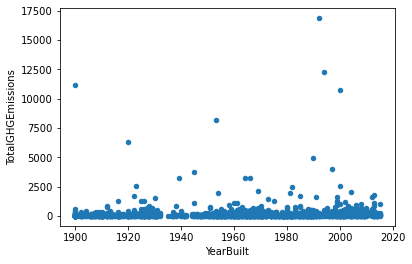

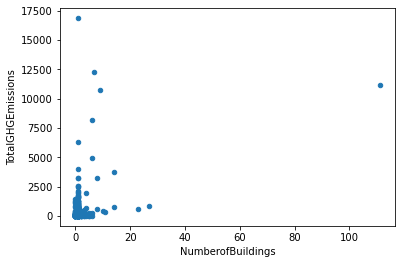

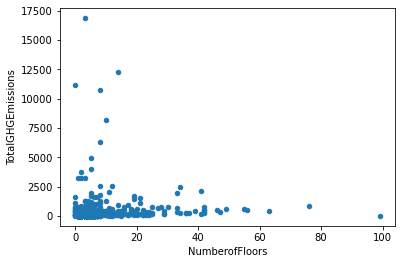

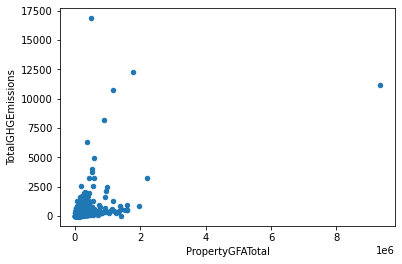

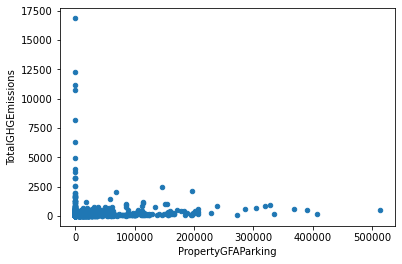

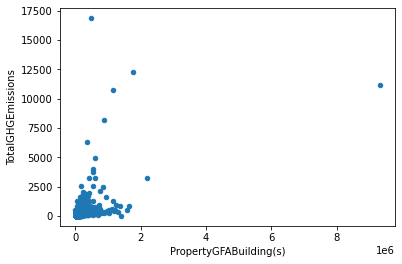

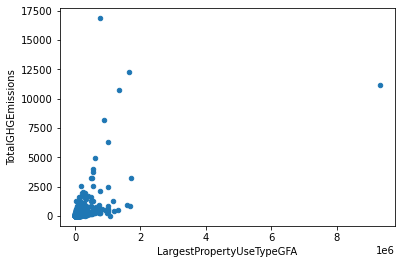

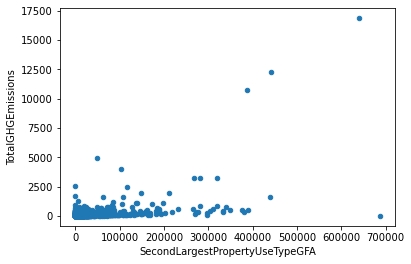

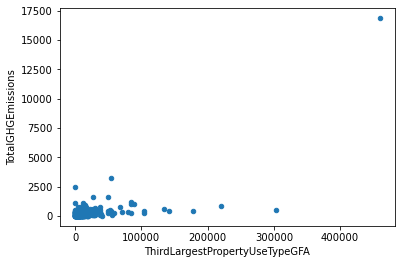

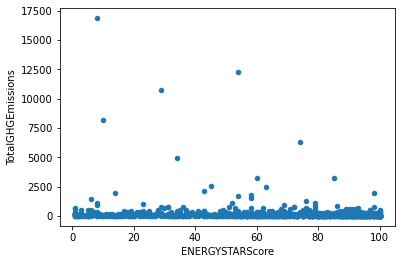

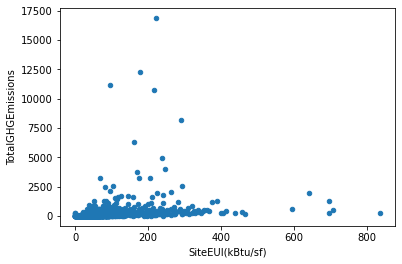

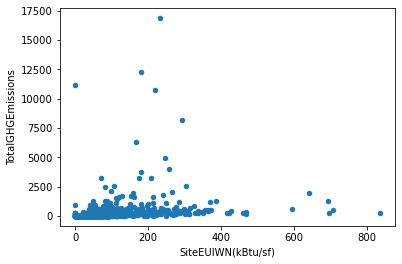

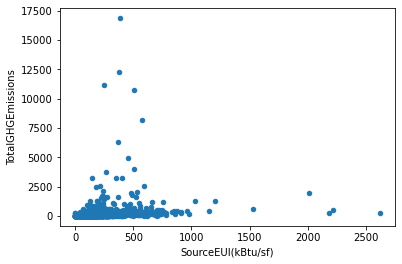

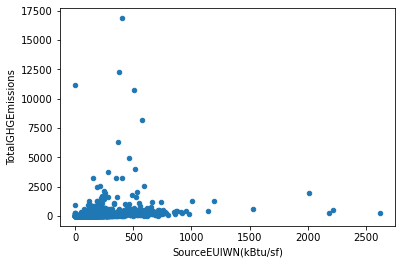

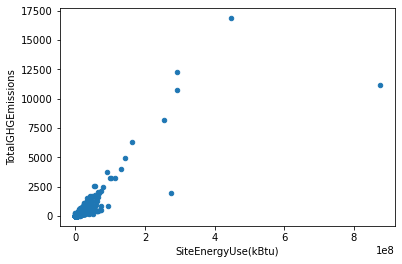

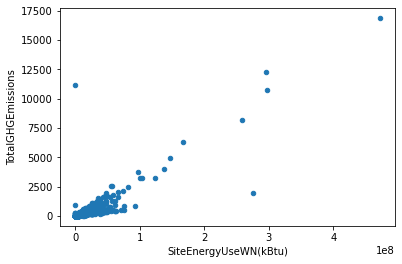

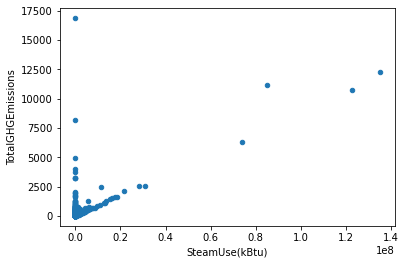

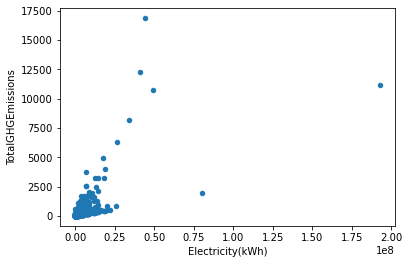

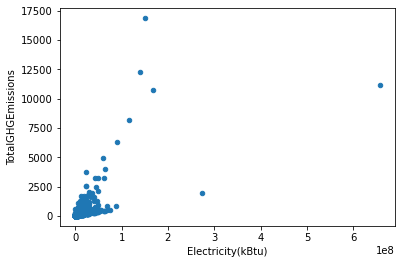

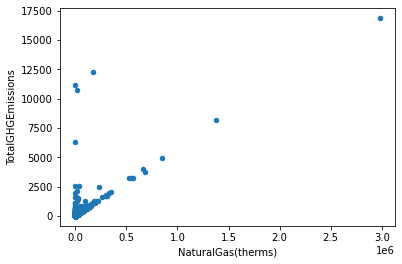

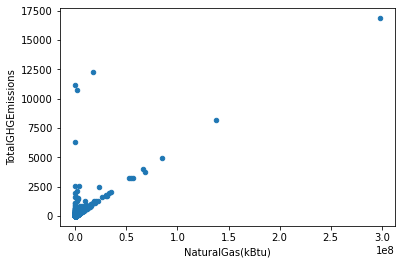

In [77]:
for nc in num_cols:
    target_vs_num_variable(nc,target='TotalGHGEmissions')
    

**Interprétation**<br>
Il semble qu'il ya une relation linéaire entre la variable cible 'TotalGHGEmissions' et respectivement les variables suiavantes:<br>
'NumberofBuildings',
'PropertyGFATotal',
'PropertyGFABuilding(s)',
'LargestPropertyUseTypeGFA',
''SiteEnergyUse(kBtu)',
'SiteEnergyUseWN(kBtu)',
'Electricity(kWh)', 
'Electricity(kBtu)', 
'NaturalGas(therms)', 
'NaturalGas(kBtu)


### Corrélation


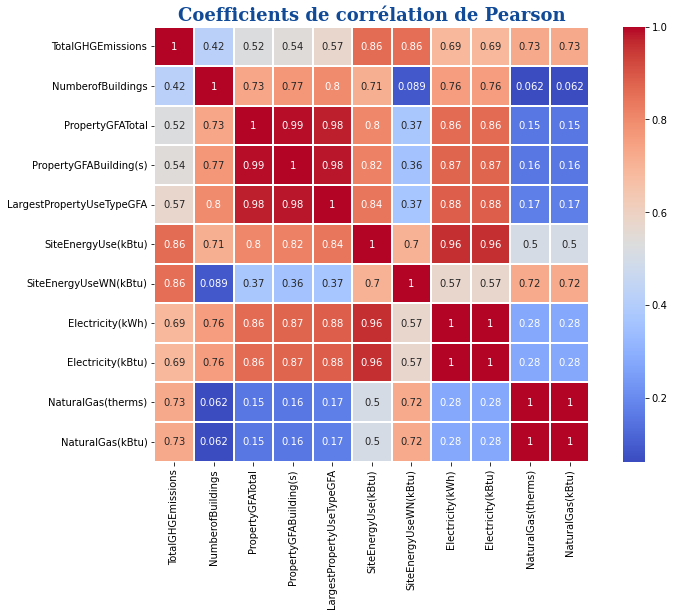

In [73]:
#look for correlated variables
fig=plt.figure(figsize=(12,8))
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
corr_mat = df[['TotalGHGEmissions','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 
               'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
               'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']].corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

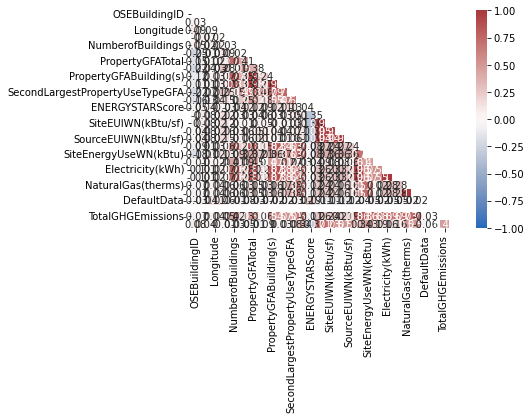

In [33]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
fig = plt.figure(figsize=(25,15))
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.show()

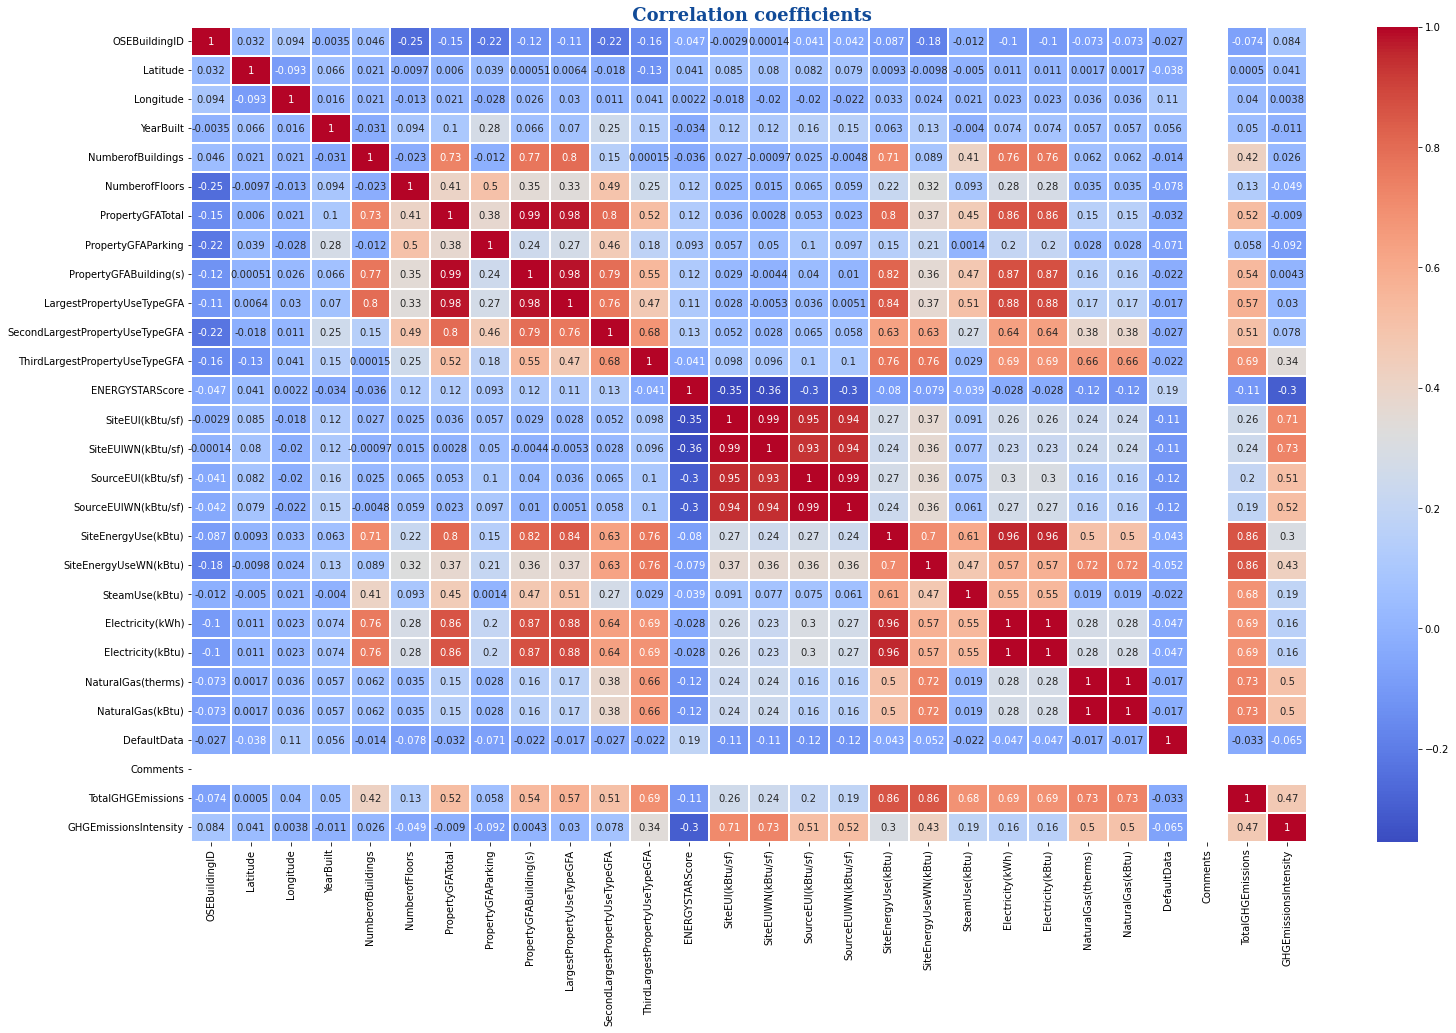

In [35]:
#coefficients des corrélations
corr_mat = df.corr()
#heatmap
fig = plt.figure(figsize=(25,15))
sns.heatmap(corr_mat, square=False, linewidths=0.01, annot=True, cmap='coolwarm')

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
plt.title(" Correlation coefficients", fontdict=font_title)
plt.show()

**Note pour le nettoyage**<br>
- TotalGHGEmissions contient des valeurs négatives <br>
- YearsENERGYSTARCertified contient des valeurs non separées par ,
